# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from IPython.display import HTML

# Import API key
api_keys = "9b6444eb3a6e2bc42ee264fc6deb9eba"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [8]:
# Getting my query_url using the imperial units, since temperatura is det in fahrenheit unit, checked in the cvs file.

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_keys}&units={units}&q="


In [10]:

city_name = []
country = []
cloudiness = []
country = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Loop through each city
for city in cities:
    
    # Create search query, make request and store in json
    #query = url + cities
    #response_jason = requests.get(query)
    #response_json = response.json()
    
    # Try to grab the info abailable in weather API
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"City close to the equador: {city}")
    
        time.sleep(2)
    # Handle exceptions for a character that is not available in the Star Wars API
    
    except KeyError:
        # Append null values
        print("City not close to the equador: {city}")


City not close to the equador: {city}
City close to the equador: ushuaia
City close to the equador: qaanaaq
City not close to the equador: {city}
City not close to the equador: {city}
City close to the equador: santa maria del oro
City close to the equador: margate
City close to the equador: mount gambier
City not close to the equador: {city}
City close to the equador: codrington
City close to the equador: tasiilaq
City close to the equador: alofi
City close to the equador: taksimo
City close to the equador: mari
City not close to the equador: {city}
City close to the equador: podor
City close to the equador: port arthur
City close to the equador: saskylakh
City close to the equador: cape town
City close to the equador: bluff
City close to the equador: rikitea
City close to the equador: kasongo-lunda
City close to the equador: faanui
City close to the equador: albany
City close to the equador: ilulissat
City close to the equador: rochegda
City close to the equador: arteaga
City not clo

City close to the equador: boende
City close to the equador: leo
City close to the equador: siwana
City close to the equador: coihaique
City close to the equador: saldanha
City close to the equador: mastung
City close to the equador: kirakira
City close to the equador: ketchikan
City close to the equador: geraldton
City close to the equador: kifri
City not close to the equador: {city}
City close to the equador: rudnogorsk
City close to the equador: saint-paul
City not close to the equador: {city}
City close to the equador: encrucijada
City close to the equador: jonesboro
City close to the equador: vila velha
City close to the equador: mahebourg
City close to the equador: kudahuvadhoo
City close to the equador: sorland
City close to the equador: san luis de la paz
City close to the equador: almora
City close to the equador: champerico
City close to the equador: makat
City close to the equador: leningradskiy
City close to the equador: grand gaube
City close to the equador: kisangani
City

City close to the equador: narsaq
City close to the equador: iracoubo
City close to the equador: ibateguara
City close to the equador: yar-sale
City close to the equador: katsuura
City close to the equador: belize
City close to the equador: galveston
City close to the equador: athabasca
City close to the equador: finschhafen
City close to the equador: sarangani
City close to the equador: pangnirtung
City close to the equador: san miguel
City close to the equador: lixourion
City close to the equador: krosno
City close to the equador: xining
City close to the equador: owensboro
City close to the equador: egvekinot
City close to the equador: riyadh
City close to the equador: san jose
City close to the equador: sabha
City close to the equador: raudeberg
City close to the equador: upata
City close to the equador: sangmelima
City close to the equador: zhangye
City close to the equador: kolondieba
City close to the equador: shimoda
City not close to the equador: {city}
City close to the equad

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Dictionary 
weather_cities = {
    "City" : city_name, 
    "Country" : country,
    "Cloudiness" : cloudiness,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temperature" : max_temp,
    "Wind Speed" : wind_speed
    }
weather_cities_d = pd.DataFrame(weather_cities)
weather_cities_d.head()

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Ushuaia,AR,100,97,-54.8000,-68.3000,42.13,2.44
1,Qaanaaq,GL,0,67,77.4840,-69.3632,0.48,7.09
2,Santa María del Oro,MX,2,28,25.9333,-105.3667,63.50,14.43
3,Margate,GB,100,93,51.3813,1.3862,43.30,7.00
4,Mount Gambier,AU,100,88,-37.8333,140.7667,64.31,14.97


In [16]:
# Save Data to csv

weather_cities_d.to_csv(output_data_file)

weather_cities_d.head(10)

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,New Norfolk,AU,12,44,-42.7826,147.0587,79.88,3.00
1,George Town,MY,20,82,5.4112,100.3354,84.13,5.01
2,Nome,US,82,95,64.5011,-165.4064,9.55,5.32
3,Cape Town,ZA,40,88,-33.9258,18.4232,66.61,6.91
4,Coquimbo,CL,0,88,-29.9533,-71.3436,60.53,3.44
5,Alice Springs,AU,5,43,-23.7000,133.8833,99.95,11.50
6,Los Llanos de Aridane,ES,40,77,28.6585,-17.9182,60.55,11.50
7,Fayaoué,NC,100,75,-20.6500,166.5333,82.62,8.52
8,Kasongo-Lunda,CD,100,97,-6.4667,16.8167,70.21,0.38
9,Port Alfred,ZA,1,82,-33.5906,26.8910,65.89,6.46


## There aren't cities with humidity > 100%. Please see the data frames below: 
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Filter all rows for which cities have humidity over 100%.
weather_cities_d.loc[weather_cities_d['Humidity'] >= 100,:]

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temperature,Wind Speed
31,Thompson,CA,99,100,55.7435,-97.8558,-3.19,2.55
123,Verkhnyaya Inta,RU,48,100,65.9811,60.3094,-30.12,4.07
162,Coquimbo,CL,0,100,-29.9533,-71.3436,60.53,0.00
287,Dikson,RU,96,100,73.5069,80.5464,-27.18,8.25
317,Mountain Home,US,100,100,43.1330,-115.6912,41.74,8.05
429,Krosno,PL,98,100,49.6887,21.7706,34.05,3.58
468,Naryan-Mar,RU,96,100,67.6713,53.0870,-26.03,4.05
485,Aleksandrov Gay,RU,100,100,50.1470,48.5704,32.11,12.28


In [19]:
result = weather_cities_d.to_html()
print(result)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>City</th>
      <th>Country</th>
      <th>Cloudiness</th>
      <th>Humidity</th>
      <th>Lat</th>
      <th>Lng</th>
      <th>Max Temperature</th>
      <th>Wind Speed</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>New Norfolk</td>
      <td>AU</td>
      <td>12</td>
      <td>44</td>
      <td>-42.7826</td>
      <td>147.0587</td>
      <td>79.88</td>
      <td>3.00</td>
    </tr>
    <tr>
      <th>1</th>
      <td>George Town</td>
      <td>MY</td>
      <td>20</td>
      <td>82</td>
      <td>5.4112</td>
      <td>100.3354</td>
      <td>84.13</td>
      <td>5.01</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Nome</td>
      <td>US</td>
      <td>82</td>
      <td>95</td>
      <td>64.5011</td>
      <td>-165.4064</td>
      <td>9.55</td>
      <td>5.32</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Cape Town</td>
      <td>ZA</td>
     

In [13]:
#  Get the indices of cities that have humidity over 100%.
mean_agg = weather_cities_d.groupby(["City"]).agg(["mean"])
mean_agg_d = pd.DataFrame(mean_agg)

mean_agg_d.head()

,Cloudiness,Humidity,Lat,Lng,Max Temperature,Wind Speed
,mean,mean,mean,mean,mean,mean
City,,,,,,
Adelaide,20,65,-34.9333,138.6000,76.21,20.71
Adrar,0,34,20.5022,-10.0711,61.75,9.57
Agirish,100,96,61.9247,63.0231,7.20,5.19
Ahipara,74,54,-35.1667,173.1667,74.55,11.32
Ahome,0,51,25.9167,-109.1833,67.95,6.38


In [14]:
max_tem_agg = weather_cities_d.groupby(["Max Temperature"]).agg(["max"])
max_tem_agg_d = pd.DataFrame(max_tem_agg)

max_tem_agg_d.head()

,City,Country,Cloudiness,Humidity,Lat,Lng,Wind Speed
,max,max,max,max,max,max,max
Max Temperature,,,,,,,
-30.12,Verkhnyaya Inta,RU,48,100,65.9811,60.3094,4.07
-28.28,Saskylakh,RU,98,99,71.9167,114.0833,0.63
-27.18,Dikson,RU,96,100,73.5069,80.5464,8.25
-26.48,Kayerkan,RU,19,74,69.3497,87.7602,2.57
-26.03,Naryan-Mar,RU,96,100,67.6713,53.0870,4.05


In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

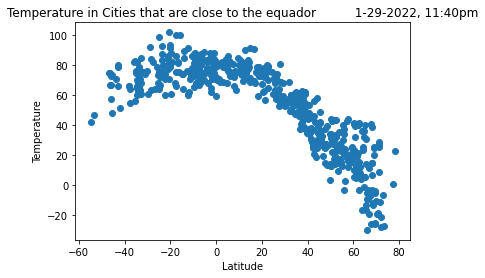

<Figure size 432x288 with 0 Axes>

In [16]:
# Build a scatter plot for each data type

x_values = weather_cities_d["Lat"]
y_values = weather_cities_d["Max Temperature"]
plt.scatter(x_values,y_values)
plt.title("Temperature in Cities that are close to the equador\
          1-29-2022, 11:40pm")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

# Save the figure
plt.savefig("LatTemp.png")


## Latitude vs. Humidity Plot

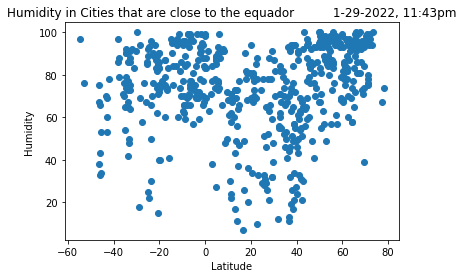

<Figure size 432x288 with 0 Axes>

In [17]:
# Build a scatter plot for each data type

x_values = weather_cities_d["Lat"]
y_values = weather_cities_d["Humidity"]
plt.scatter(x_values,y_values)
plt.title("Humidity in Cities that are close to the equador\
          1-29-2022, 11:43pm")
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.show()

# Save the figure
plt.savefig("LatHumid.png")

## Latitude vs. Cloudiness Plot

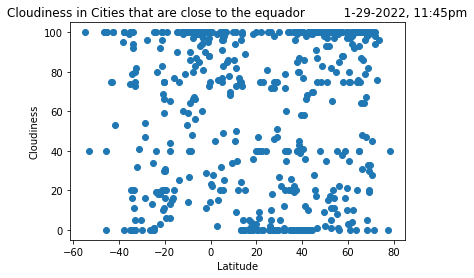

<Figure size 432x288 with 0 Axes>

In [18]:
# Build a scatter plot for each data type

x_values = weather_cities_d["Lat"]
y_values = weather_cities_d["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title("Cloudiness in Cities that are close to the equador\
          1-29-2022, 11:45pm")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.show()

# Save the figure
plt.savefig("LatCloudi.png")

## Latitude vs. Wind Speed Plot

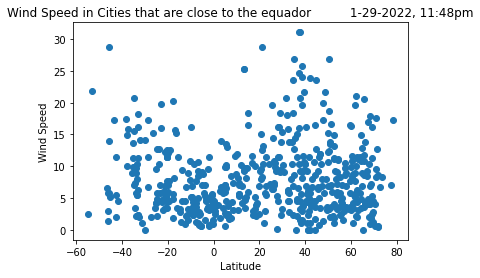

<Figure size 432x288 with 0 Axes>

In [19]:
# Build a scatter plot for each data type

x_values = weather_cities_d["Lat"]
y_values = weather_cities_d["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title("Wind Speed in Cities that are close to the equador\
          1-29-2022, 11:48pm")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.show()

# Save the figure
plt.savefig("LatWindSpeed.png")

## Linear Regression

R squared: 0.6468580333124361


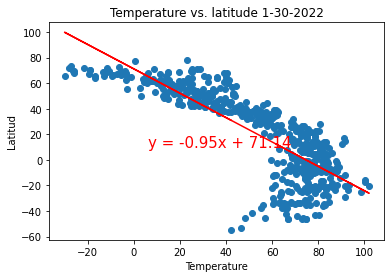

In [20]:
# Perform a linear regression on temperature vs. latitude

y_values = weather_cities_d["Lat"]
x_values = weather_cities_d["Max Temperature"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Temperature')
plt.ylabel('Latitud')
plt.title("Temperature vs. latitude 1-30-2022")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_Lat_vs_Temp.png")


In [21]:
# Northern Hemisphere Data Frames

north_hem = weather_cities_d.loc[weather_cities_d["Lat"] >= 0]
north_hem_df= pd.DataFrame(north_hem)

north_hem_df.head()

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temperature,Wind Speed
1,Qaanaaq,GL,0,67,77.4840,-69.3632,0.48,7.09
2,Santa María del Oro,MX,2,28,25.9333,-105.3667,63.50,14.43
3,Margate,GB,100,93,51.3813,1.3862,43.30,7.00
6,Tasiilaq,GL,100,97,65.6145,-37.6368,30.36,20.62
8,Taksimo,RU,22,76,56.3444,114.8794,2.66,1.52


In [22]:
# Southern Hemisphere Data Frames

south_hem = weather_cities_d.loc[weather_cities_d["Lat"] < 0]
south_hem_df= pd.DataFrame(south_hem)

south_hem_df.head()

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Ushuaia,AR,100,97,-54.8000,-68.3000,42.13,2.44
4,Mount Gambier,AU,100,88,-37.8333,140.7667,64.31,14.97
5,Codrington,AU,95,86,-38.2667,141.9667,65.91,17.47
7,Alofi,NU,100,77,-19.0595,-169.9187,81.82,12.57
9,Mari,BR,67,93,-7.0600,-35.3194,76.01,5.08


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.8051921668283567


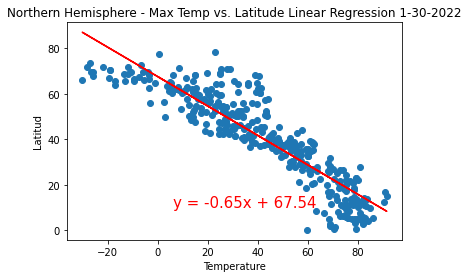

In [23]:


y_values = north_hem_df["Lat"]
x_values = north_hem_df["Max Temperature"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Temperature')
plt.ylabel('Latitud')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression 1-30-2022")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_North_Max_t_vs_Lat.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.14342102793280243


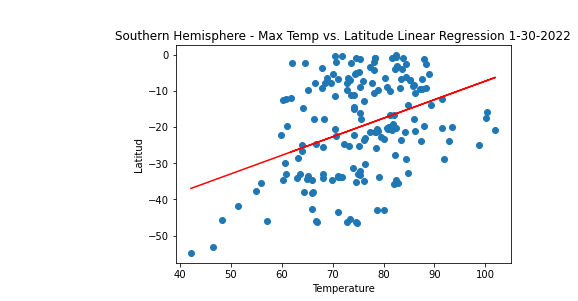

In [24]:
y_values = south_hem_df["Lat"]
x_values = south_hem_df["Max Temperature"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Temperature')
plt.ylabel('Latitud')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression 1-30-2022")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_South_Max_t_vs_Lat.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.1328014353126859


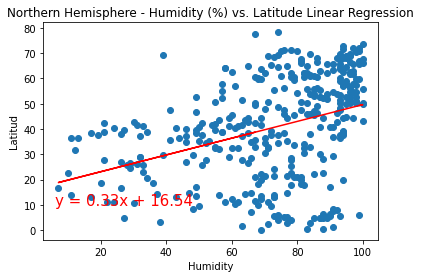

In [25]:

x_values = north_hem_df["Humidity"]
y_values = north_hem_df["Lat"]


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity')
plt.ylabel('Latitud')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_North_Humid_vs_Lat.png")

In [26]:
north_hem_df["Humidity"].mean()


71.91689750692521

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.07333151828238871


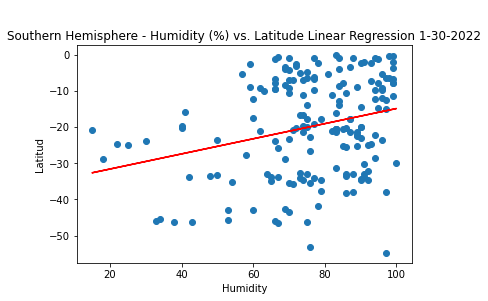

In [27]:
y_values = south_hem_df["Lat"]
x_values = south_hem_df["Humidity"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel("Humidity")
plt.ylabel('Latitud')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression 1-30-2022")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_South_Humid_vs_Lat.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.033995859442989815


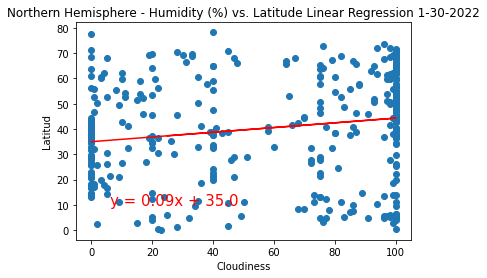

In [28]:
x_values = north_hem_df["Cloudiness"]
y_values = north_hem_df["Lat"]


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel("Cloudiness")
plt.ylabel('Latitud')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 1-30-2022")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_North_Cloudi_vs_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.05741020163188934


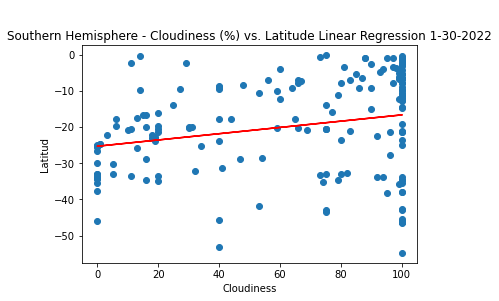

In [29]:
y_values = south_hem_df["Lat"]
x_values = south_hem_df["Cloudiness"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitud')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 1-30-2022")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_South_Cloudi_vs_Lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 1.4894334260110554e-07


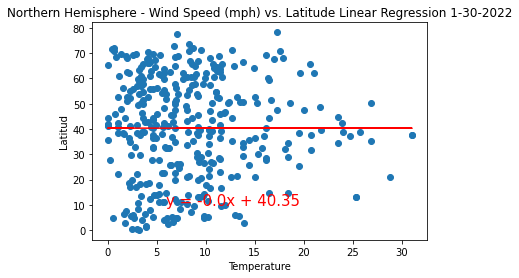

In [30]:
y_values = north_hem_df["Lat"]
x_values = north_hem_df["Wind Speed"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Temperature')
plt.ylabel('Latitud')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 1-30-2022")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_North_W_Speed_vs_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.14217485228141025


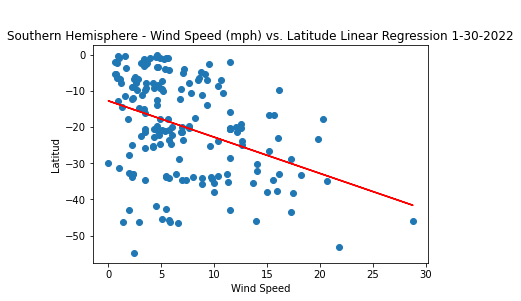

In [31]:
y_values = south_hem_df["Lat"]
x_values = south_hem_df["Wind Speed"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel("Wind Speed")
plt.ylabel('Latitud')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 1-30-2022")

# Print r square value
print(f"R squared: {rvalue**2}")


# Save the figure
plt.savefig("Reg_South_W_Speed_vs_Lat.png")